In [13]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Multiclass Classification

# Stochastic Gradient Descent (SGD) classifier

In [5]:
from sklearn.linear_model import SGDClassifier

#SGDClassifier relies on randomness during training
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
random_digit=X[35]
# Check prediction
sgd_clf.decision_function([random_digit])

array([[-14400.67322862, -11585.51697742,  -7766.21413227,
          -482.92574848, -10954.47634734,    588.01312633,
        -23848.72014809, -13492.71061272,  -2651.17639341,
        -10108.09543083]])

In [17]:
y[35] # 588.013 ^

5

In [19]:
from sklearn.model_selection import cross_val_score

# Evaluate Accuracy
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87082583, 0.87089354, 0.88628294])

In [20]:
from sklearn.preprocessing import StandardScaler

# Increases accuracy
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

D:\Software\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.89957009, 0.89344467, 0.89963495])

## Support Vector Machine

In [ ]:
#from sklearn.svm import SVC
#svm_clf = SVC()
#svm_clf.fit(X_train, y_train)

#random_digit=X[35]
#svm_clf.predict([random_digit])

## OneVsOneClassifier or OneVsRestClassifier

In [ ]:
#from sklearn.multiclass import OneVsRestClassifier

#ovr_clf = OneVsRestClassifier(SVC())
#ovr_clf.fit(X_train, y_train)
#ovr_clf.predict([randomdigit])

In [ ]:
#ovr_clf.estimators_

# Error Analysis

In [26]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

D:\Software\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [24]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5576,    0,   21,    6,    9,   43,   37,    6,  224,    1],
       [   0, 6398,   38,   23,    4,   44,    4,    8,  213,   10],
       [  26,   27, 5242,   90,   71,   26,   62,   36,  371,    7],
       [  24,   17,  117, 5220,    2,  208,   28,   40,  405,   70],
       [  12,   14,   48,   10, 5192,   10,   36,   26,  330,  164],
       [  28,   15,   33,  166,   55, 4437,   76,   14,  538,   59],
       [  30,   14,   41,    2,   43,   95, 5560,    4,  128,    1],
       [  21,    9,   52,   27,   51,   12,    3, 5693,  188,  209],
       [  17,   63,   46,   90,    3,  125,   25,   10, 5429,   43],
       [  23,   18,   31,   66,  116,   32,    1,  179,  377, 5106]],
      dtype=int64)

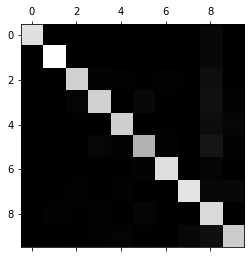

In [27]:
# image representation
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
# Maxtrix look good

In [28]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

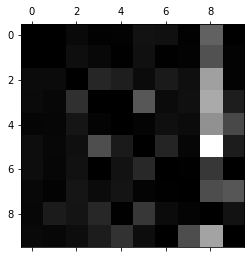

In [29]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [30]:
# need more look-like 8 picture